Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Reading the image

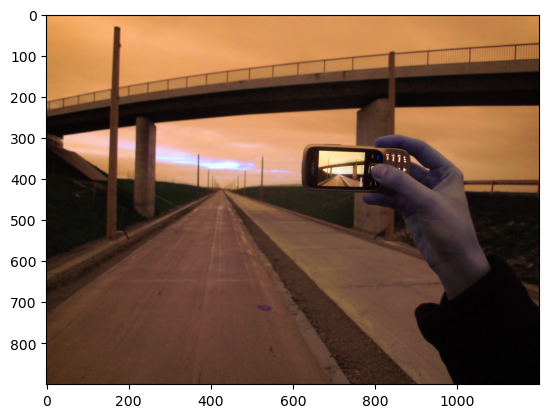

In [2]:
img = cv2.imread("sample.png", cv2.IMREAD_UNCHANGED)
plt.imshow(img)

In [3]:
print(img.shape)

(900, 1200, 3)


BGR to RGB

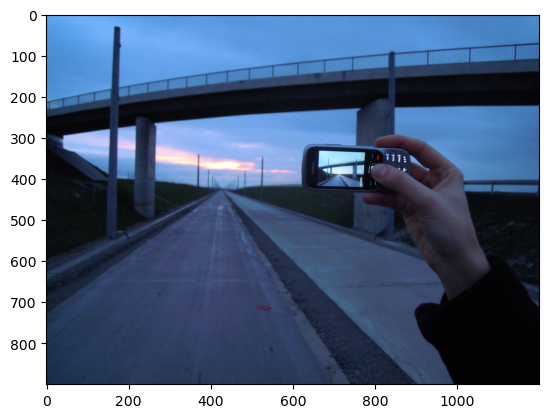

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Flattening the image

In [5]:
pixel_values = img.reshape((-1, 3))

pixel_values = np.float32(pixel_values)

In [6]:
print(pixel_values.shape)

(1080000, 3)


Stopping Criteria

In [7]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [8]:
criteria

(3, 100, 0.2)

Clustering

In [9]:
k = 3 #number of clusters
_, labels, (centers)= cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [10]:
labels

array([[2],
       [2],
       [2],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [11]:
centers

array([[ 51.29139 ,  66.28656 ,  99.75006 ],
       [ 14.804622,  17.427517,  24.91529 ],
       [101.89329 , 154.14482 , 216.82402 ]], dtype=float32)

Parameters

In [12]:
centers = np.uint8(centers)

labels = labels.flatten()

Final Image Formation

In [13]:
segmented_image = centers[labels.flatten()]

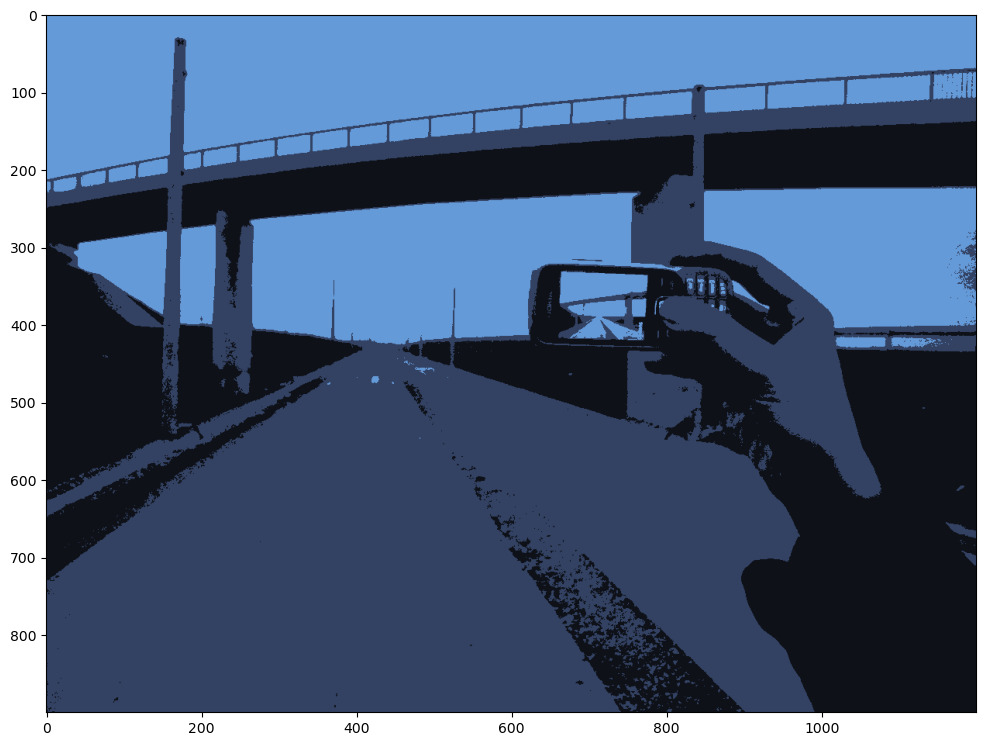

In [14]:
segmented_image = segmented_image.reshape(img.shape)

plt.figure(figsize=(12,10))
plt.imshow(segmented_image)
plt.show()